In [16]:
import matplotlib.pyplot as plt
import plotly
import plotly.offline as offline

plotly.offline.init_notebook_mode()
import numpy as np
import csv
title="Mass Conservation vs time"
xlabel="time"
ylabel="volume"

basename="/Users/weugene/basilisk/work/Verification_ring/"
names=["Penalization method", "Popinet's method"]
filenames = ["BPcons.txt", "Popinetcons.txt"]
lines = {}
xmin =[]; xmax=[]; ymin=[]; ymax=[]
for name,filename  in zip(names, filenames):
    try:
        with open(basename + filename, 'r')  as f_obj:
            x, y = zip(*[map(float, l.split()) for l in f_obj])
            x = np.asarray(x)
            y = np.asarray(y)
            lines[name] = {"x":x, "y":y}
            xmin.append(x.min());ymin.append(y.min());xmax.append(x.max());ymax.append(y.max());
    except FileNotFoundError:
        raise FileNotFoundError
xmin=min(xmin); xmax=max(xmax); ymin=min(ymin); ymax=max(ymax)
axis=[0,1.5, ymin, ymax*1.1]

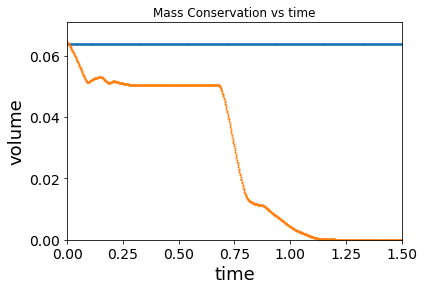

In [17]:
for name in names:
    plt.scatter(lines[name]["x"], lines[name]["y"],s=1)
if title!="":
    plt.title(title)
plt.xlabel(xlabel, fontsize=18)
plt.ylabel(ylabel, fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=14)
if axis!=[]:
    plt.axis(axis)

In [27]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()
for name in names:
    fig.add_trace(go.Scatter(x=lines[name]["x"], y=lines[name]["y"], mode='lines', name=name))
fig.update_layout(title=title,
                   xaxis_title=xlabel,
                   yaxis_title=ylabel,xaxis = dict(
        range=(0, 1.5),
        constrain='domain'
    ))

# fig.show()

offline.iplot(fig,
             image='svg')

In [29]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()
name=names[0]
fig.add_trace(go.Scatter(x=lines[name]["x"], y=lines[name]["y"], mode='lines', name=name))
fig.update_layout(title=title+" for Penalization Method",
                   xaxis_title=xlabel,
                   yaxis_title=ylabel,xaxis = dict(
        range=(0, 1.5),
        constrain='domain'
    ))

# fig.show()
offline.iplot(fig,
             image='svg')

In [20]:
# fig.write_image("fig1.png")

In [22]:
# import plotly
# import plotly.offline as offline

# plotly.offline.init_notebook_mode()

# offline.iplot(fig,
#              image='svg')

In [23]:
# import plotly.graph_objects as go
# fig = go.Figure(
#     data=[go.Bar(y=[2, 1, 3])],
#     layout_title_text="A Figure Displayed with the 'svg' Renderer"
# )
# fig.show(renderer="svg")